<a href="https://colab.research.google.com/github/sfreedoms2035/LLM-apps/blob/main/Gemma3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Test of Gemma 3 n

### Login Huggingface

In [13]:
from huggingface_hub import HfFolder, login

# Check if a token is already saved
if HfFolder.get_token() is None:
    login()  # Will prompt only if not logged in

In [15]:
# Install a transformers version that supports Gemma 3n (>= 4.53)
!pip install "transformers>=4.53.0" "timm>=1.0.16"


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 111.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 108.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 47.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 28.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 863.1 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Chat helper function

In [1]:
import torch

GEMMA_PATH = "google/gemma-3n-E2B-it" #@param ["google/gemma-3n-E2B-it", "google/gemma-3n-E4B-it"]
RESOURCE_URL_PREFIX = "https://raw.githubusercontent.com/google-gemini/gemma-cookbook/refs/heads/main/Demos/sample-data/"

from IPython.display import Audio, Image, Markdown, display

class ChatState():
  def __init__(self, model, processor):
    self.model = model
    self.processor = processor
    self.history = []

  def send_message(self, message, max_tokens=256):
    self.history.append(message)

    input_ids = self.processor.apply_chat_template(
        self.history,
        add_generation_prompt=True,
        tokenize=True,
        return_dict=True,
        return_tensors="pt",
    )
    input_len = input_ids["input_ids"].shape[-1]

    input_ids = input_ids.to(self.model.device, dtype=model.dtype)
    outputs = self.model.generate(
        **input_ids,
        max_new_tokens=max_tokens,
        disable_compile=True
    )
    text = self.processor.batch_decode(
        outputs[:, input_len:],
        skip_special_tokens=True,
        clean_up_tokenization_spaces=True
    )
    self.history.append({
        "role": "assistant",
        "content": [
            {"type": "text", "text": text[0]},
        ]
    })

    # display chat
    for item in message['content']:
      if item['type'] == 'text':
        formatted_prompt = "<font size='+1' color='brown'>🙋‍♂️<blockquote>\n" + item['text'] + "\n</blockquote></font>"
        display(Markdown(formatted_prompt))
      elif item['type'] == 'audio':
        display(Audio(item['audio']))
      elif item['type'] == 'image':
        display(Image(item['image']))

    formatted_text = "<font size='+1' color='teal'>🤖<blockquote>\n" + text[0] + "\n</blockquote></font>"
    display(Markdown(formatted_text))


Load the model

In [2]:
from transformers import AutoModelForImageTextToText, AutoProcessor

processor = AutoProcessor.from_pretrained(GEMMA_PATH)
model = AutoModelForImageTextToText.from_pretrained(GEMMA_PATH, torch_dtype="auto", device_map="auto")

print(f"Device: {model.device}")
print(f"DType: {model.dtype}")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/159k [00:00<?, ?B/s]

Fetching 3 files:   0%|          | 0/3 [00:00<?, ?it/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/2.82G [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/3.08G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/215 [00:00<?, ?B/s]

Device: cuda:0
DType: torch.bfloat16


Image understanding

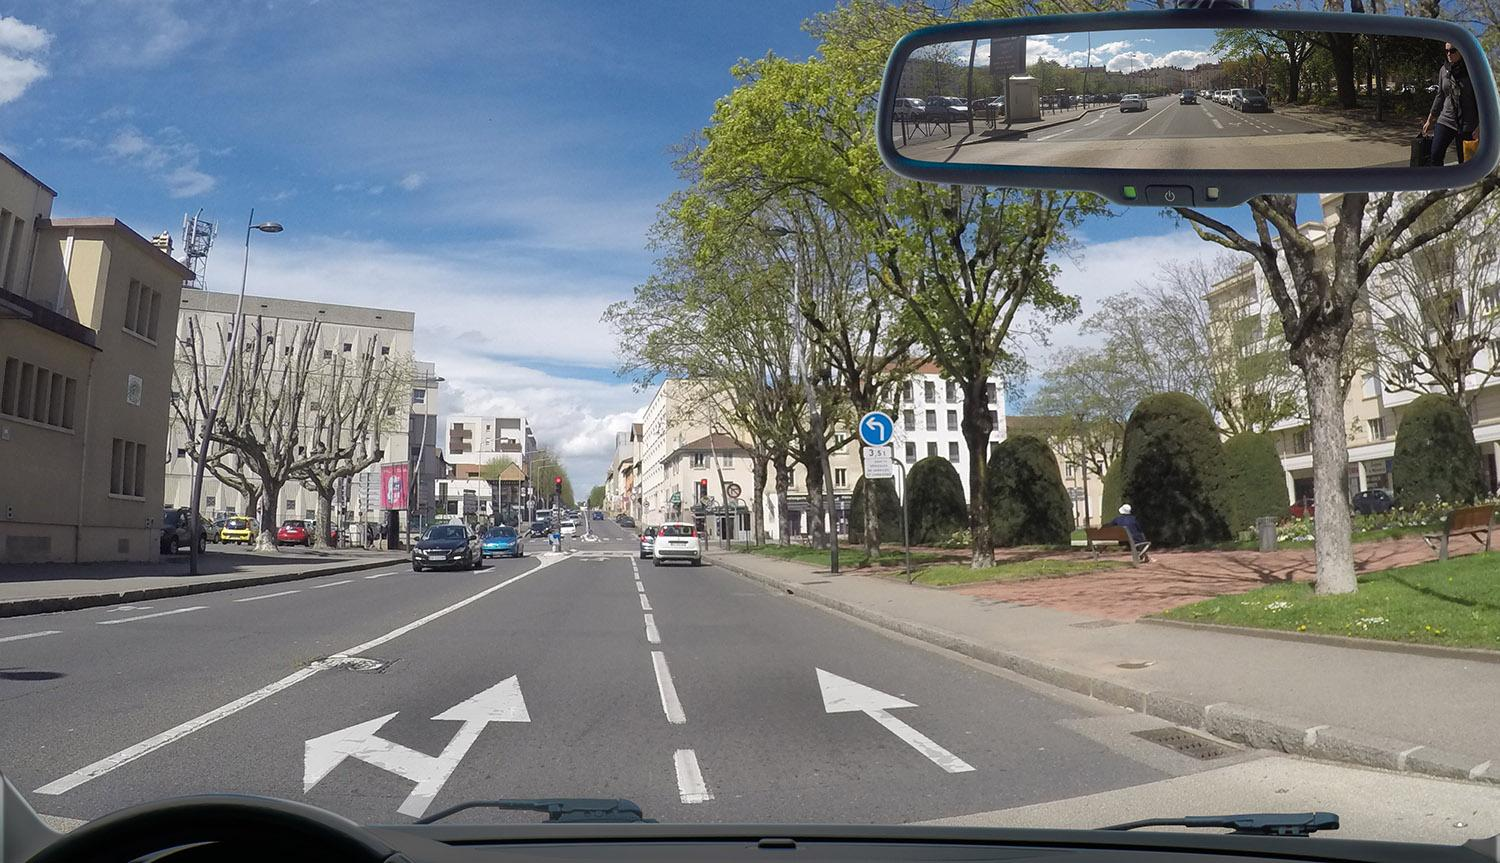

<font size='+1' color='brown'>🙋‍♂️<blockquote>
You are a selfdriving car, describe the own vehicle behavior based on the captured front camera mounted behind the windshield, consider the road elements, other vehicles and relevant traffic signs
</blockquote></font>

<font size='+1' color='teal'>🤖<blockquote>
## Self-Driving Car Behavior Report - Current State

**Vehicle:** [Assuming a generic self-driving car model, e.g., "Autonomous Vehicle Alpha"]
**Current Position:** Proceeding on a multi-lane road in an urban environment. 
**Speed:** Currently maintaining a speed of approximately 30 km/h (estimated based on visual cues - slight motion blur).
**Lane:** Currently in the right lane (marked by solid white lines). 

**Road Elements & Infrastructure:**

* **Road:** A two-lane road with a single lane in each direction. Lane markings are clearly visible (solid white lines separating lanes, dashed white lines indicating lanes). 
* **Road Signs:** 
    * A circular blue and white sign with a white "P" indicates a parking zone on the right side of the road. 
    * A road sign with a white arrow pointing right, overlaid with a white "X" (likely indicating a turning restriction or a no-turn zone). 
* **Traffic Flow:** Moderate traffic density. Other vehicles are present in both lanes, maintaining a safe distance. 

**Other Vehicles:**

* **Vehicles in Right Lane:** Several vehicles are present in the right lane, including cars and vans. They appear to be moving at a similar speed and following the lane markings.
* **Vehicles in Left Lane:** Vehicles are also present in the left lane, and their behavior seems consistent with the right lane traffic. 

**Environment:**

* **Weather:** Clear, sunny day with a blue sky and scattered clouds. 
* **Roadside:** A sidewalk is present on the right side of the road, with trees and greenery. 
* **Buildings:** Buildings line the street on both sides, characteristic of an urban area.

**Current Actions:**

* **Following Traffic Laws:** The vehicle is adhering to the lane markings and maintaining a safe speed and distance from other vehicles.
* **Yielding:** The vehicle is currently yielding to traffic in the left lane, as indicated by the presence of other vehicles.
* **Anticipating Turns:** The presence of the "X" sign suggests a potential turning restriction ahead. The vehicle is likely monitoring the situation to anticipate any changes in traffic flow or road conditions. 
* **Maintaining Safe Distance:** The vehicle is maintaining a safe following distance from the vehicle in front. 

**Future Actions:**

Based on the current situation, the vehicle will continue to follow the planned route, maintain safe driving practices, and adjust to any changes in traffic conditions, road signs, or weather. 



**Note:** This report is based on the limited visual information provided in the image. Real-time data from sensors (e.g., GPS, lidar, radar) would provide a more comprehensive and accurate picture of the vehicle's behavior. 



</blockquote></font>

In [7]:
prompt = {
    "role": "user",
    "content": [
        {"type": "image", "image": "/content/sample_data/2545.jpg"},
        {"type": "text", "text": "You are a selfdriving car, describe the own vehicle behavior based on the captured front camera mounted behind the windshield, consider the road elements, other vehicles and relevant traffic signs"},
    ]
}

chat = ChatState(model, processor)
chat.send_message(prompt, max_tokens=2048)

In [4]:
!pip install ipywebrtc

In [5]:
from google.colab import output
output.enable_custom_widget_manager()

from ipywebrtc import AudioRecorder, CameraStream

camera = CameraStream(constraints={'audio': True,'video':False})
recorder = AudioRecorder(stream=camera)
recorder

AudioRecorder(audio=Audio(value=b'', format='webm'), stream=CameraStream(constraints={'audio': True, 'video': …

In [6]:
with open('/content/recording.webm', 'wb') as f:
    f.write(recorder.audio.value)
!ffmpeg -i /content/recording.webm /content/recording.wav -y

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

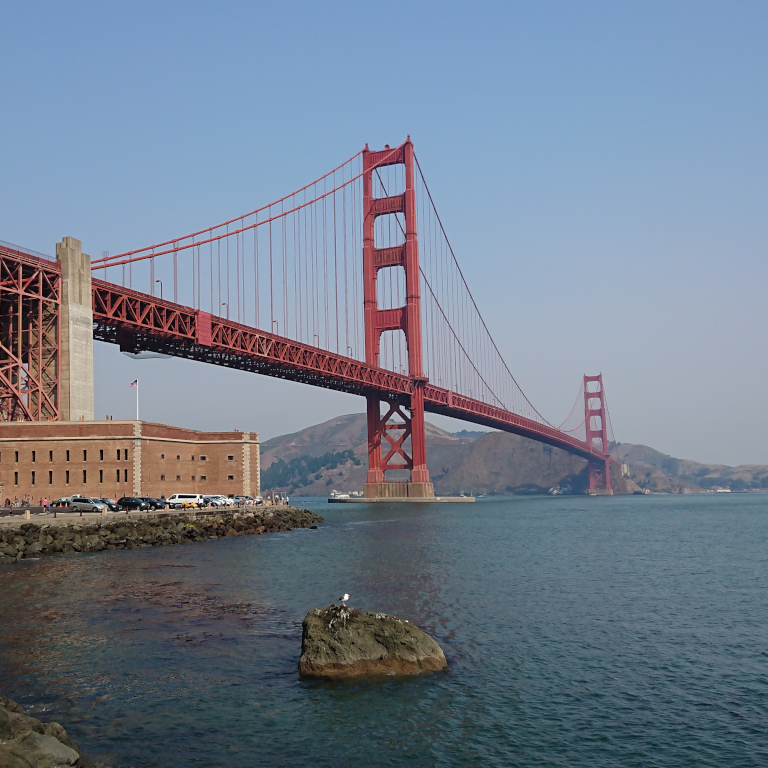

<font size='+1' color='teal'>🤖<blockquote>
The Golden Gate Bridge was completed in 1937.
</blockquote></font>

In [7]:
prompt = {
  "role": "user",
  "content": [
    {"type": "image", "image": f"{RESOURCE_URL_PREFIX}GoldenGate.png"},
    {"type": "audio", "audio": "/content/recording.wav"},
  ]
}
chat = ChatState(model, processor)
chat.send_message(prompt)